# Model Building
To answer the following questions:
1. how do behaviors affect mental health (depressive disorder)?
2. how do behaviors (and other illness, especially mental illness) affect chance of getting cancer?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# from sklearn.impute import SimpleImputer
from scipy import stats
plt.style.use('ggplot')

In [68]:
path = "C:/Users/yao_p/Downloads/behavioral-risk-factor-surveillance-system/2015.csv"
df = pd.read_csv(path)

In [69]:
bh_factor = ['_INCOMG','MARITAL','_AGEG5YR','EDUCA','_PA150R2','_PA300R2','_PAREC1','_RFBING5','_RFSMOK3','_BMI5CAT']
illness = ['ADDEPEV2','DIABETE3','CHCKIDNY','CHCSCNCR','CHCOCNCR']

df_bh = df[bh_factor+illness]

In [70]:
df_bh['_INCOMG'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['MARITAL'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_AGEG5YR'].replace(to_replace=14, value=np.nan, inplace=True)
df_bh['EDUCA'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_PA150R2'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_PA300R2'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_PAREC1'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_RFBING5'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_RFSMOK3'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['_BMI5CAT'].replace(to_replace=5, value=np.nan, inplace=True)

df_bh['ADDEPEV2'].replace(to_replace=7, value=np.nan, inplace=True)
df_bh['ADDEPEV2'].replace(to_replace=9, value=np.nan, inplace=True)

df_bh['DIABETE3'].replace(to_replace=7, value=np.nan, inplace=True)
df_bh['DIABETE3'].replace(to_replace=9, value=np.nan, inplace=True)
df_bh['DIABETE3'].replace(to_replace=2, value=1, inplace=True)
df_bh['DIABETE3'].replace(to_replace=3, value=2, inplace=True)
df_bh['DIABETE3'].replace(to_replace=4, value=2, inplace=True)

df_bh['CHCKIDNY'].replace(to_replace=7, value=np.nan, inplace=True)
df_bh['CHCKIDNY'].replace(to_replace=9, value=np.nan, inplace=True)

df_bh['CHCSCNCR'].replace(to_replace=7, value=np.nan, inplace=True)
df_bh['CHCSCNCR'].replace(to_replace=9, value=np.nan, inplace=True)

df_bh['CHCOCNCR'].replace(to_replace=7, value=np.nan, inplace=True)
df_bh['CHCOCNCR'].replace(to_replace=9, value=np.nan, inplace=True)

df_bh.dropna(inplace=True)
df_bh.reset_index(drop=True, inplace=True)

C:\Users\yao_p\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\yao_p\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
df_bh.columns = ['income',
                'marriage_status',
                'age_cat',
                'edu',
                'exercise_cat150', 
                'exercise_cat300',
                'exercise_guide',
                'binge',
                'smoke',
                'bmi_cat',
                'depress_disorder',
                'diabetes',
                'kidney',
                'skin_cancer',
                'other_cancer',
                ]

income_dict = {1:'<15,000',
              2:'>15,000 and < 25,000',
              3:'>25,000 and < 35,000',
              4:'>35,000 and <50,000',
              5:'>50,000',
              9:"don't know/not sure/missing"}

smoke_dict = {1:'no',
             2:'yes',
             9:"don't know/refused/missing"}

binge_dict = {1:'no',
             2:'yes',
             9:"don't know/refused/missing"}

m150_dict = {1:'more than 150 min',
            2:'less than 150 min',
            3:'0 min',
            9:"don't know/not sure/refused/missing"}

m300_dict = {1:'more than 300 min',
            2:'less than 300 min',
            3:'0 min',
            9:"don't know/not sure/refused/missing"}

guide_dict = {1:'meet both',
            2:'meet aerobic guideline only',
            3:'meet strengthening guideline only',
            4:'meet neigher',
            9:"don't know/not sure/refused/missing"}

bmi_dict = {1:'underweight',
           2:'normal weight',
           3:'overweight',
           4:'obese',
           5:"don't know/refused/missing"}

marr_dict = {1:'married',
            2:'divorced',
            3:'widowed',
            4:'separated',
            5:'never married',
            6:'member of an unmarried couple',
            9:'refused'}

age_dict = {1:'18-24',
           2:'25-29',
           3:'30-34',
           4:'35-39',
           5:'40-44',
           6:'45-49',
           7:'50-54',
           8:'55-59',
           9:'60-64',
           10:'65-69',
           11:'70-74',
           12:'75-79',
           13:'80 and above',
           14:"don't know/refused/missing"}

edu_dict = {1:'never', 
            2:'elementary', 
            3:'some high school', 
            4:'high school grad', 
            5:'some college', 
            6:"college grad", 
            9:'refused'}

depress_dict = {1:'yes',
               2:'no',
               7:"don't know/not sure",
               9:'refused'}

diab_dict = {1:'yes',
            2:'yes, but female during pregnancy',
            3:'no',
            4:'no, pre- or border-diabetes',
            7:"don't know/not sure",
            9:'refused'}

kidney_dict = {1:'yes',
               2:'no',
               7:"don't know/not sure",
               9:'refused'}

skin_dict = {1:'yes',
            2:'no',
            7:"don't know",
            9:'refused'}

other_cancer_dict = {1:'yes',
            2:'no',
            7:"don't know",
            9:'refused'}

In [57]:
def change_label(series, dictionary):
    temp = [dictionary[val] for val in series]
    return pd.Series(temp)

In [58]:
df_bh['income'].update(change_label(df_bh['income'], income_dict))
df_bh['marriage_status'].update(change_label(df_bh['marriage_status'], marr_dict))
df_bh['age_cat'].update(change_label(df_bh['age_cat'], age_dict))
df_bh['edu'].update(change_label(df_bh['edu'], edu_dict))
df_bh['exercise_cat150'].update(change_label(df_bh['exercise_cat150'], m150_dict))
df_bh['exercise_cat300'].update(change_label(df_bh['exercise_cat300'], m300_dict))
df_bh['exercise_guide'].update(change_label(df_bh['exercise_guide'], guide_dict))
df_bh['binge'].update(change_label(df_bh['binge'], binge_dict))
df_bh['smoke'].update(change_label(df_bh['smoke'], smoke_dict))
df_bh['bmi_cat'].update(change_label(df_bh['bmi_cat'], bmi_dict))
df_bh['depress_disorder'].update(change_label(df_bh['depress_disorder'], depress_dict))
df_bh['diabetes'].update(change_label(df_bh['diabetes'], diab_dict))
df_bh['kidney'].update(change_label(df_bh['kidney'], kidney_dict))
df_bh['skin_cancer'].update(change_label(df_bh['skin_cancer'], skin_dict))
df_bh['other_cancer'].update(change_label(df_bh['other_cancer'], other_cancer_dict))

C:\Users\yao_p\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\yao_p\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\yao_p\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(c

In [76]:
df_bh.to_csv('cat_behavior_vs_depressive_discorder.csv', index=False)

## Use Multiple classifier to predict despressive disorder from behaviors 

In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.utils import resample


# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
read_from_file = True
if read_from_file:
#     path = '/content/gdrive/My Drive/cat_behavior_vs_depressive_discorder.csv'
    path = 'cat_behavior_vs_depressive_discorder.csv'
    df_bh = pd.read_csv(path)
else:
    pass

In [3]:
disease_label = ['other_cancer']
disease_labels = ['depress_disorder','diabetes','kidney','skin_cancer','other_cancer']
# behavior_labels = ['income','exercise_cat150','exercise_cat300','exercise_guide','bmi_cat']
disease_labels.remove(disease_label[0])
X = df_bh.drop(columns=disease_labels)
# X = df_bh[df_bh['age_cat']>=8]
# X = X[behavior_labels+disease_label]

temp = X[disease_label[0]].value_counts()
X_majority = X[X[disease_label[0]]==2]
X_minority = X[X[disease_label[0]]==1]

# upsample minority label or downsample majority label
upsampled = True
if upsampled:
    X_minority_upsampled = resample(X_minority,
                                    replace=True,
                                    n_samples=temp.values[0],
                                    random_state=123)
    X_upsampled = pd.concat([X_majority, X_minority_upsampled])
    X_upsampled = shuffle(X_upsampled)
    y = X_upsampled[disease_label[0]]
    X = X_upsampled.drop(columns=disease_label)
else:
    X_majority_downsampled = resample(X_majority,
                                    replace=False,
                                    n_samples=temp.values[1],
                                    random_state=123)
    X_downsampled = pd.concat([X_minority, X_majority_downsampled])
    X_downsampled = shuffle(X_downsampled)
    y = X_downsampled[disease_label[0]]
    X = X_downsampled.drop(columns=disease_label)

y[y==2.0] = 0
# y[y==1.0] = True
for column in list(X.columns):
    X[column] = X[column].astype('category')
X = pd.get_dummies(X)
print('size of X is: {}'.format(X.shape))



size of X is: (542574, 48)


In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,, random_state=21)
# LR = LogisticRegression()
# NB = GaussianNB()
# SVC = SVC(probability=True)


GB = GradientBoostingClassifier(max_depth=5, n_estimators=200, max_features='auto', verbose=1)
AB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500)
RF = RandomForestClassifier(max_depth=10, n_estimators=500, verbose=1, n_jobs=-1)
VC = VotingClassifier(estimators=[('RF',RF),('GB',GB),('AB',AB)], voting='soft', n_jobs=-1)


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.3s finished


      Iter       Train Loss   Remaining Time 
         1           1.3620            5.43m
         2           1.3422            4.98m
         3           1.3268            4.66m
         4           1.3147            4.49m
         5           1.3024            4.48m
         6           1.2923            4.30m
         7           1.2831            4.30m
         8           1.2754            4.19m
         9           1.2686            4.21m
        10           1.2631            4.18m
        20           1.2296            4.06m
        30           1.2160            4.01m
        40           1.2094            3.73m
        50           1.2052            3.52m
        60           1.2023            3.32m
        70           1.2000            3.11m
        80           1.1981            2.88m
        90           1.1966            2.64m
       100           1.1951            2.43m
       200           1.1842            0.00s


VotingClassifier(estimators=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weig...e,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [ ]:
# individual classifier
# LR.fit(Xtrain, ytrain)
# NB.fit(Xtrain, ytrain)
# SVC.fit(Xtrain, ytrain)

# ensemble classifier
RF.fit(Xtrain, ytrain)
AB.fit(Xtrain, ytrain)
GB.fit(Xtrain, ytrain)
VC.fit(Xtrain, ytrain)

# ANN
ANN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=20)

In [6]:
ypred = RF.predict(Xtrain)
print('random forest recall score (train case): {}'.format(recall_score(ytrain, ypred, pos_label=1)))
ypred = RF.predict(Xtest)
print('random forest recall score (test case): {}'.format(recall_score(ytest, ypred, pos_label=1)))

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    6.1s finished


random forest recall score (train case): 0.7049171263080772


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.2s finished


random forest recall score (test case): 0.7034825870646766


In [8]:
ypred = GB.predict(Xtrain)
print('Gradient boost recall score (train case): {}'.format(recall_score(ytrain, ypred, pos_label=1)))
ypred = GB.predict(Xtest)
print('Gradient boost recall score (test case): {}'.format(recall_score(ytest, ypred, pos_label=1)))

Gradient boost recall score (train case): 0.7650690959694402
Gradient boost recall score (test case): 0.7628892574166206


In [9]:
ypred = AB.predict(Xtrain)
print('Ada boost recall score (train case): {}'.format(recall_score(ytrain, ypred, pos_label=1)))
ypred = AB.predict(Xtest)
print('Ada boost recall score (test case): {}'.format(recall_score(ytest, ypred, pos_label=1)))

Ada boost recall score (train case): 0.7956842090711788
Ada boost recall score (test case): 0.7840058964437074


In [ ]:
ypred = VC.predict(Xtrain)
print('Voting classifier recall score (train case): {}'.format(recall_score(ytrain, ypred, pos_label=1)))
ypred = VC.predict(Xtest)
print('Voting classifier recall score (test case): {}'.format(recall_score(ytest, ypred, pos_label=1)))

#### Adaboost gives the best accuracy among all ensemble estimators

Tune hyperparameters to improve Adaboost scores

In [106]:
AB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=750)
AB.fit(Xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=750, random_state=None)

In [108]:
ypred = AB.predict(Xtrain)
print('Ada boost recall score (train case): {}'.format(recall_score(ytrain, ypred, pos_label=1)))
ypred = AB.predict(Xtest)
print('Ada boost recall score (test case): {}'.format(recall_score(ytest, ypred, pos_label=1)))

Ada boost recall score (train case): 0.7851388895576431
Ada boost recall score (test case): 0.773058814448904


#### ANN model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

y = pd.get_dummies(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=21)

def ANN_model():
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_dim=Xtrain.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

ANN = ANN_model()

early_stop = [EarlyStopping(monitor='categorical_crossentropy', min_delta=0, patience=3, verbose=1, mode='auto')]

# ANN
history = ANN.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=250, batch_size=10000, callbacks=early_stop)

Train on 434059 samples, validate on 108515 samples
Epoch 1/250
434059/434059 [==============================] - 3s 7us/step - loss: 0.6269 - acc: 0.6510 - val_loss: 0.6025 - val_acc: 0.6721
Epoch 2/250
 30000/434059 [=>............................] - ETA: 1s - loss: 0.6069 - acc: 0.6733

C:\Users\yao_p\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


434059/434059 [==============================] - 2s 4us/step - loss: 0.6091 - acc: 0.6705 - val_loss: 0.5995 - val_acc: 0.6743
Epoch 3/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.6057 - acc: 0.6716 - val_loss: 0.5981 - val_acc: 0.6744
Epoch 4/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.6024 - acc: 0.6737 - val_loss: 0.5947 - val_acc: 0.6759
Epoch 5/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.5996 - acc: 0.6753 - val_loss: 0.5918 - val_acc: 0.6776
Epoch 6/250
434059/434059 [==============================] - 2s 5us/step - loss: 0.5961 - acc: 0.6777 - val_loss: 0.5882 - val_acc: 0.6802
Epoch 7/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.5921 - acc: 0.6799 - val_loss: 0.5842 - val_acc: 0.6821
Epoch 8/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.5880 - acc: 0.6819 - val_loss: 0.5808 - val_acc: 0.6841
Epoch 9/250
434059/434059 [============

434059/434059 [==============================] - 2s 4us/step - loss: 0.4876 - acc: 0.7446 - val_loss: 0.4886 - val_acc: 0.7447
Epoch 61/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4881 - acc: 0.7446 - val_loss: 0.4872 - val_acc: 0.7454
Epoch 62/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4870 - acc: 0.7453 - val_loss: 0.4874 - val_acc: 0.7459
Epoch 63/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4866 - acc: 0.7449 - val_loss: 0.4875 - val_acc: 0.7451
Epoch 64/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4856 - acc: 0.7458 - val_loss: 0.4866 - val_acc: 0.7458
Epoch 65/250
434059/434059 [==============================] - 2s 5us/step - loss: 0.4848 - acc: 0.7465 - val_loss: 0.4861 - val_acc: 0.7467
Epoch 66/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4850 - acc: 0.7461 - val_loss: 0.4870 - val_acc: 0.7461
Epoch 67/250
434059/434059 [=====

434059/434059 [==============================] - 2s 4us/step - loss: 0.4739 - acc: 0.7517 - val_loss: 0.4799 - val_acc: 0.7497
Epoch 119/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4735 - acc: 0.7516 - val_loss: 0.4795 - val_acc: 0.7504
Epoch 120/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4737 - acc: 0.7525 - val_loss: 0.4800 - val_acc: 0.7498
Epoch 121/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4735 - acc: 0.7519 - val_loss: 0.4796 - val_acc: 0.7496
Epoch 122/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4734 - acc: 0.7526 - val_loss: 0.4802 - val_acc: 0.7503
Epoch 123/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4733 - acc: 0.7523 - val_loss: 0.4791 - val_acc: 0.7505
Epoch 124/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4730 - acc: 0.7526 - val_loss: 0.4796 - val_acc: 0.7508
Epoch 125/250
434059/434059

434059/434059 [==============================] - 2s 5us/step - loss: 0.4681 - acc: 0.7547 - val_loss: 0.4782 - val_acc: 0.7509
Epoch 177/250
434059/434059 [==============================] - 2s 5us/step - loss: 0.4685 - acc: 0.7547 - val_loss: 0.4793 - val_acc: 0.7513
Epoch 178/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4679 - acc: 0.7547 - val_loss: 0.4783 - val_acc: 0.7514
Epoch 179/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4680 - acc: 0.7548 - val_loss: 0.4793 - val_acc: 0.7508
Epoch 180/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4687 - acc: 0.7547 - val_loss: 0.4779 - val_acc: 0.7516
Epoch 181/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4678 - acc: 0.7553 - val_loss: 0.4770 - val_acc: 0.7513
Epoch 182/250
434059/434059 [==============================] - 2s 5us/step - loss: 0.4681 - acc: 0.7549 - val_loss: 0.4799 - val_acc: 0.7512
Epoch 183/250
434059/434059

434059/434059 [==============================] - 2s 4us/step - loss: 0.4649 - acc: 0.7562 - val_loss: 0.4772 - val_acc: 0.7525
Epoch 235/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4653 - acc: 0.7561 - val_loss: 0.4761 - val_acc: 0.7520
Epoch 236/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4655 - acc: 0.7560 - val_loss: 0.4782 - val_acc: 0.7523
Epoch 237/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4655 - acc: 0.7559 - val_loss: 0.4776 - val_acc: 0.7518
Epoch 238/250
434059/434059 [==============================] - 2s 4us/step - loss: 0.4653 - acc: 0.7560 - val_loss: 0.4769 - val_acc: 0.7520
Epoch 239/250
434059/434059 [==============================] - 2s 5us/step - loss: 0.4659 - acc: 0.7558 - val_loss: 0.4788 - val_acc: 0.7515
Epoch 240/250
434059/434059 [==============================] - 2s 5us/step - loss: 0.4651 - acc: 0.7563 - val_loss: 0.4763 - val_acc: 0.7526
Epoch 241/250
434059/434059

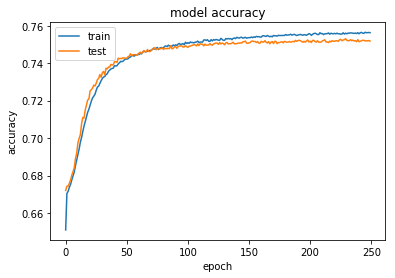

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

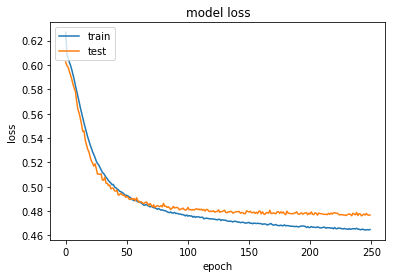

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()